# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [6]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [7]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 594


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [9]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "metric"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + "appid=" + weather_api_key + "&q=" + city + "&units=" + units
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds =city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | kuhmo
Processing Record 2 of Set 1 | tura
Processing Record 3 of Set 1 | waitangi
Processing Record 4 of Set 1 | invercargill
Processing Record 5 of Set 1 | chos malal
Processing Record 6 of Set 1 | port-aux-francais
Processing Record 7 of Set 1 | iskateley
Processing Record 8 of Set 1 | blackmans bay
Processing Record 9 of Set 1 | albany
Processing Record 10 of Set 1 | coahuayana de hidalgo
Processing Record 11 of Set 1 | visby
Processing Record 12 of Set 1 | adamstown
Processing Record 13 of Set 1 | summerside
Processing Record 14 of Set 1 | egilsstadir
Processing Record 15 of Set 1 | terekeka
City not found. Skipping...
Processing Record 16 of Set 1 | kapuskasing
Processing Record 17 of Set 1 | new norfolk
Processing Record 18 of Set 1 | san luis de la loma
Processing Record 19 of Set 1 | grytviken
Processing Record 20 of Set 1 | el granada
Processing Record 21 of Set 1 | caleta de carquin
Pro

Processing Record 36 of Set 4 | nueva rosita
Processing Record 37 of Set 4 | lagunas
Processing Record 38 of Set 4 | ankara
Processing Record 39 of Set 4 | puyang chengguanzhen
Processing Record 40 of Set 4 | ataq
Processing Record 41 of Set 4 | sinabang
Processing Record 42 of Set 4 | nogliki
Processing Record 43 of Set 4 | san jose de jachal
Processing Record 44 of Set 4 | cassilandia
Processing Record 45 of Set 4 | newman
Processing Record 46 of Set 4 | vikhorevka
Processing Record 47 of Set 4 | rundu
Processing Record 48 of Set 4 | bamboo flat
Processing Record 49 of Set 4 | muynoq
Processing Record 0 of Set 5 | baotou
Processing Record 1 of Set 5 | balykshi
Processing Record 2 of Set 5 | tsiombe
Processing Record 3 of Set 5 | hoemul-li
Processing Record 4 of Set 5 | sitampiky
City not found. Skipping...
Processing Record 5 of Set 5 | naze
Processing Record 6 of Set 5 | grand-bassam
Processing Record 7 of Set 5 | badger
Processing Record 8 of Set 5 | lagoa
Processing Record 9 of Se

Processing Record 31 of Set 8 | yarmouth
Processing Record 32 of Set 8 | rio preto da eva
Processing Record 33 of Set 8 | ujae
Processing Record 34 of Set 8 | sokur
Processing Record 35 of Set 8 | borovskoy
Processing Record 36 of Set 8 | chonchi
Processing Record 37 of Set 8 | nyrob
Processing Record 38 of Set 8 | victoria falls
Processing Record 39 of Set 8 | laminusa
Processing Record 40 of Set 8 | meybod
Processing Record 41 of Set 8 | craig
Processing Record 42 of Set 8 | podporozh'ye
Processing Record 43 of Set 8 | mount gambier
Processing Record 44 of Set 8 | alpena
Processing Record 45 of Set 8 | atafu village
Processing Record 46 of Set 8 | saint-joseph
Processing Record 47 of Set 8 | swakopmund
Processing Record 48 of Set 8 | leava
Processing Record 49 of Set 8 | tevriz
Processing Record 0 of Set 9 | okhotsk
Processing Record 1 of Set 9 | bubaque
Processing Record 2 of Set 9 | park city
Processing Record 3 of Set 9 | ontario
Processing Record 4 of Set 9 | salahonda
Processing

Processing Record 19 of Set 12 | savanna-la-mar
Processing Record 20 of Set 12 | sidney
Processing Record 21 of Set 12 | greeneville
Processing Record 22 of Set 12 | lusambo
Processing Record 23 of Set 12 | baukau
Processing Record 24 of Set 12 | lompoc
Processing Record 25 of Set 12 | bowen
Processing Record 26 of Set 12 | axim
Processing Record 27 of Set 12 | remire-montjoly
Processing Record 28 of Set 12 | moroni
Processing Record 29 of Set 12 | ashburton
Processing Record 30 of Set 12 | springs
Processing Record 31 of Set 12 | palopo
Processing Record 32 of Set 12 | atbara
Processing Record 33 of Set 12 | belozersk
Processing Record 34 of Set 12 | santarem
Processing Record 35 of Set 12 | zouerate
Processing Record 36 of Set 12 | moab
Processing Record 37 of Set 12 | dikhil
Processing Record 38 of Set 12 | al kharijah
Processing Record 39 of Set 12 | fedorovskiy
Processing Record 40 of Set 12 | lapinlahti
Processing Record 41 of Set 12 | mahibadhoo
Processing Record 42 of Set 12 | 

In [10]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          566
Lat           566
Lng           566
Max Temp      566
Humidity      566
Cloudiness    566
Wind Speed    566
Country       566
Date          566
dtype: int64

In [11]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,kuhmo,64.1333,29.5167,-9.92,96,98,2.60,FI,1702503619
1,tura,25.5198,90.2201,12.84,64,0,1.06,IN,1702503619
2,waitangi,-43.9535,-176.5597,12.12,79,65,5.36,NZ,1702503619
3,invercargill,-46.4000,168.3500,12.77,62,86,5.66,NZ,1702503585
4,chos malal,-37.3781,-70.2709,27.30,9,3,6.53,AR,1702503620


In [13]:
# Export the City_Data into a csv
city_data_df.to_csv("../output_data/cities.csv", index_label="City_ID")

In [14]:
# Read saved data
city_data_df = pd.read_csv("../output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,kuhmo,64.1333,29.5167,-9.92,96,98,2.60,FI,1702503619
1,tura,25.5198,90.2201,12.84,64,0,1.06,IN,1702503619
2,waitangi,-43.9535,-176.5597,12.12,79,65,5.36,NZ,1702503619
3,invercargill,-46.4000,168.3500,12.77,62,86,5.66,NZ,1702503585
4,chos malal,-37.3781,-70.2709,27.30,9,3,6.53,AR,1702503620


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

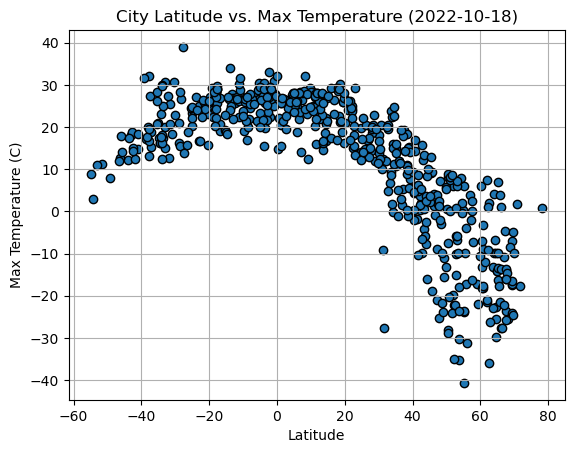

In [17]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df["Lat"], city_data_df["Max Temp"], marker = 'o', edgecolor = 'black')

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (C)")
plt.title("City Latitude vs. Max Temperature (2022-10-18)")
plt.grid()

# Save the figure
plt.savefig("../output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

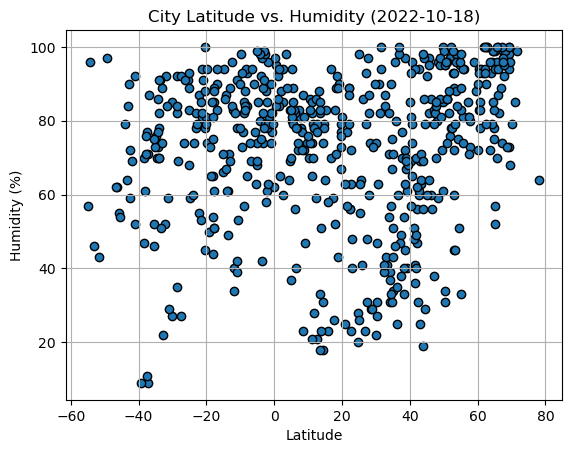

In [18]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df["Lat"], city_data_df["Humidity"], marker = 'o', edgecolor = 'black')

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title("City Latitude vs. Humidity (2022-10-18)")
plt.grid()

# Save the figure
plt.savefig("../output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

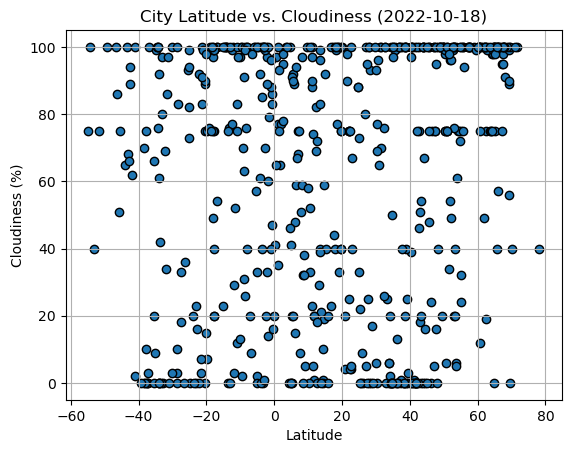

In [19]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df["Lat"], city_data_df["Cloudiness"], marker = 'o', edgecolor = 'black')

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.title("City Latitude vs. Cloudiness (2022-10-18)")
plt.grid()

# Save the figure
plt.savefig("../output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

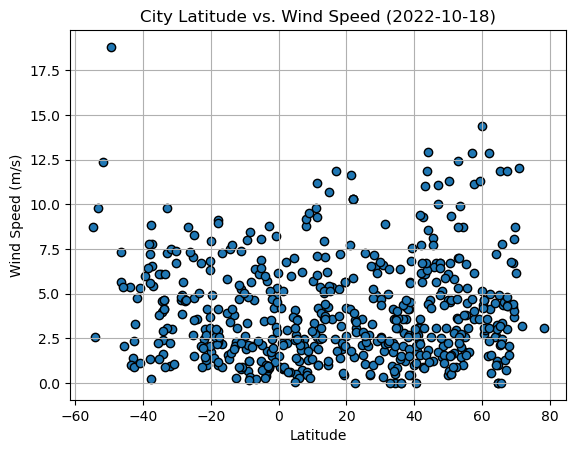

In [20]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df["Lat"], city_data_df["Wind Speed"], marker = 'o', edgecolor = 'black')

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")
plt.title("City Latitude vs. Wind Speed (2022-10-18)")
plt.grid()

# Save the figure
plt.savefig("../output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [39]:
# Define a function to create Linear Regression plots
def regression():
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    linear = x_values * slope + intercept
    plt.scatter(x_values,y_values)
    plt.plot(x_values, linear,"r-")
    line="y=" + str(round(slope, 2)) + "x+" + str(round(intercept, 2))
    plt.annotate(line, ann_loc, fontsize=12,color="red")
    print(f'The r-value is : {rvalue}')
    

In [40]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[city_data_df["Lat"] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,kuhmo,64.1333,29.5167,-9.92,96,98,2.60,FI,1702503619
1,tura,25.5198,90.2201,12.84,64,0,1.06,IN,1702503619
6,iskateley,67.6803,53.1512,-13.80,95,100,4.43,RU,1702503620
8,albany,42.6001,-73.9662,1.92,60,46,0.89,US,1702503621
9,coahuayana de hidalgo,18.7000,-103.6583,30.10,43,100,1.91,MX,1702503621


In [41]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[city_data_df["Lat"] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
2,waitangi,-43.9535,-176.5597,12.12,79,65,5.36,NZ,1702503619
3,invercargill,-46.4000,168.3500,12.77,62,86,5.66,NZ,1702503585
4,chos malal,-37.3781,-70.2709,27.30,9,3,6.53,AR,1702503620
5,port-aux-francais,-49.3500,70.2167,7.93,97,100,18.80,TF,1702503620
7,blackmans bay,-43.0167,147.3167,18.07,84,68,1.41,AU,1702503620


###  Temperature vs. Latitude Linear Regression Plot

The r-value is : -0.8388470236447394


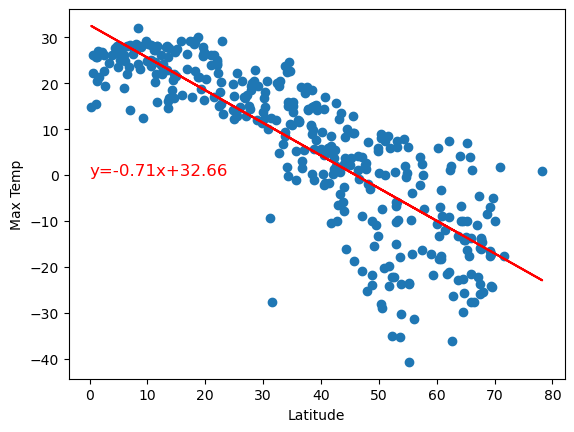

In [42]:
# Linear regression on Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
ann_loc = (0,0)
regression()
plt.xlabel("Latitude")
plt.ylabel("Max Temp")
plt.show()

The r-value is : 0.6032937199201868


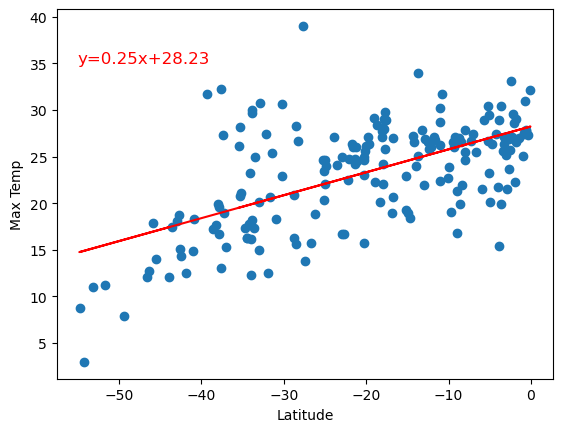

In [43]:
# Linear regression on Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
ann_loc = (-55,35)
regression()
plt.xlabel("Latitude")
plt.ylabel("Max Temp")
plt.show()

**Discussion about the linear relationship:** In these graphs above, we see that there is a strong linear relationship between latitude and max temperature. The closer the latitude gets to 0, the equator, the higher the max temp is. Contrastly the farther away from the equator the city is, the lower the max temperature.

### Humidity vs. Latitude Linear Regression Plot

The r-value is : 0.2594309989653229


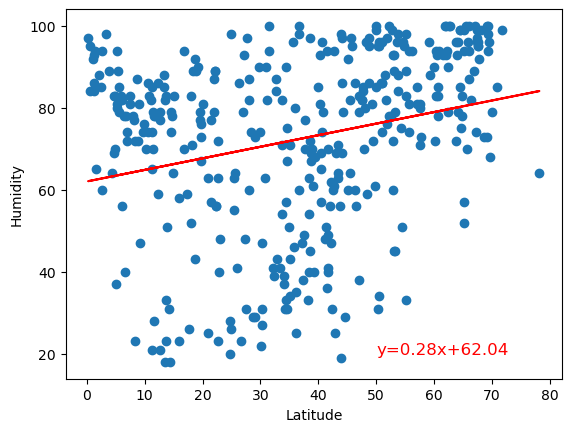

In [46]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
ann_loc = (50,20)
regression()
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.show()

The r-value is : 0.2708661140842082


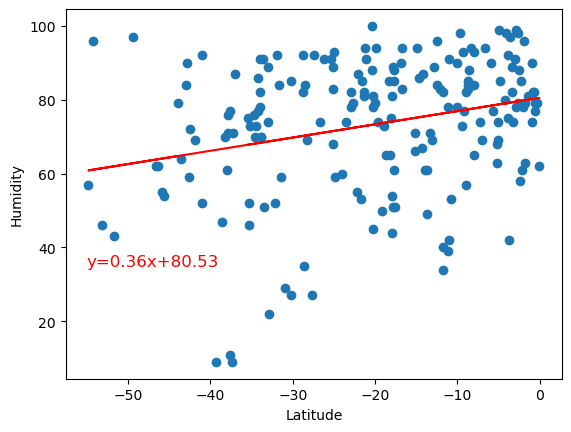

In [47]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
ann_loc = (-55,35)
regression()
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.show()

**Discussion about the linear relationship:** In these graphs above, we are comparing latitude with humidity. Constrastly to the max temperature graphs, there is not a very strong linear relationship between these two variables. In the northern hemisphere there is a slight positive correlation, in the southern it is slightly negative.

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is : 0.2554874593354143


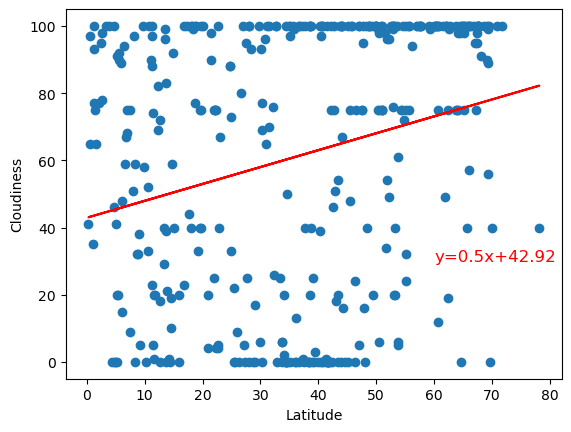

In [50]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
ann_loc = (60,30)
regression()
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.show()

The r-value is : 0.10942405730666527


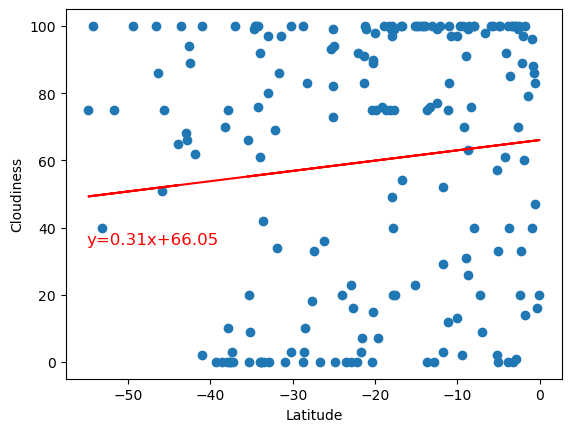

In [55]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
ann_loc = (-55,35)
regression()
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.show()

**Discussion about the linear relationship:** In these graphs above, we are comparing latitude with cloudiness. We can see that in the northern hemishpere, the cloudiness greatly increases with latitude. This means the further from the equator, the more cloudy it is. There is an opposite relationship in the southern hemisphere. The closer to the equator, the more cloudy it gets. However, this correlation is much smaller than its northern counterpart.

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is : 0.1254718745883445


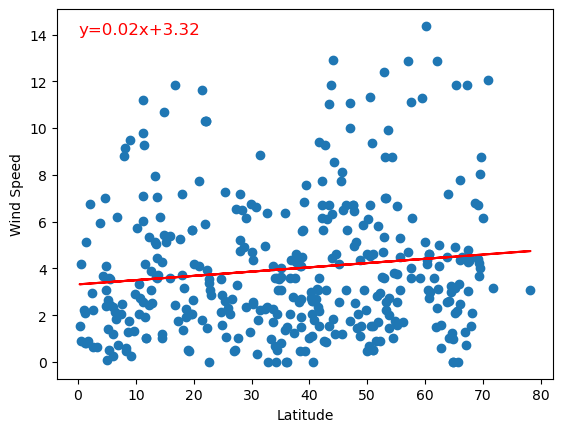

In [53]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
ann_loc = (0,14)
regression()
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.show()

The r-value is : -0.28921998881432287


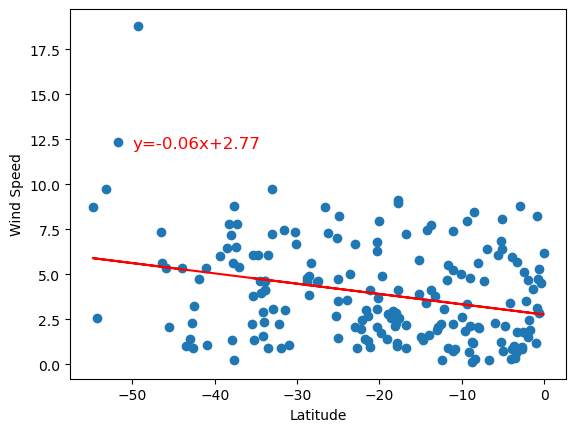

In [54]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
ann_loc = (-50,12)
regression()
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.show()

**Discussion about the linear relationship:** Simlarly to the humidity graphs, there is a small linear relationship between latitude and wind speed. But again, there is not a strong enough correlation between the two to make a definitive statement. It is worth noting that there is one city in the southern hemisphere that is a signifcant outlier with wind speeds upwards of 18 mph.